# K Nearest Neighbors Project 

Welcome to the KNN Project!

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Get the Data


In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head() 

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
len(df.duplicated())

1000

In [6]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

<Axes: xlabel='TARGET CLASS', ylabel='count'>

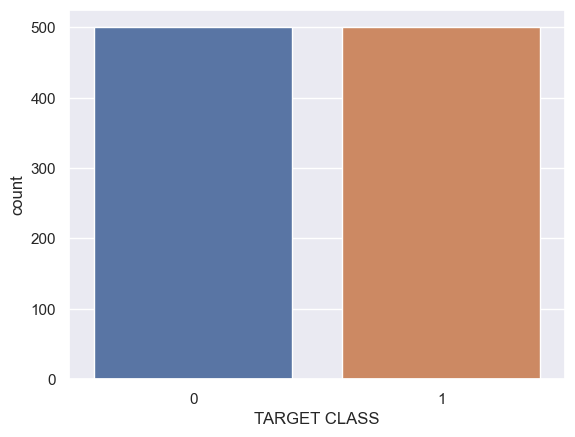

In [7]:
sns.countplot(data = df,x='TARGET CLASS')

# EDA



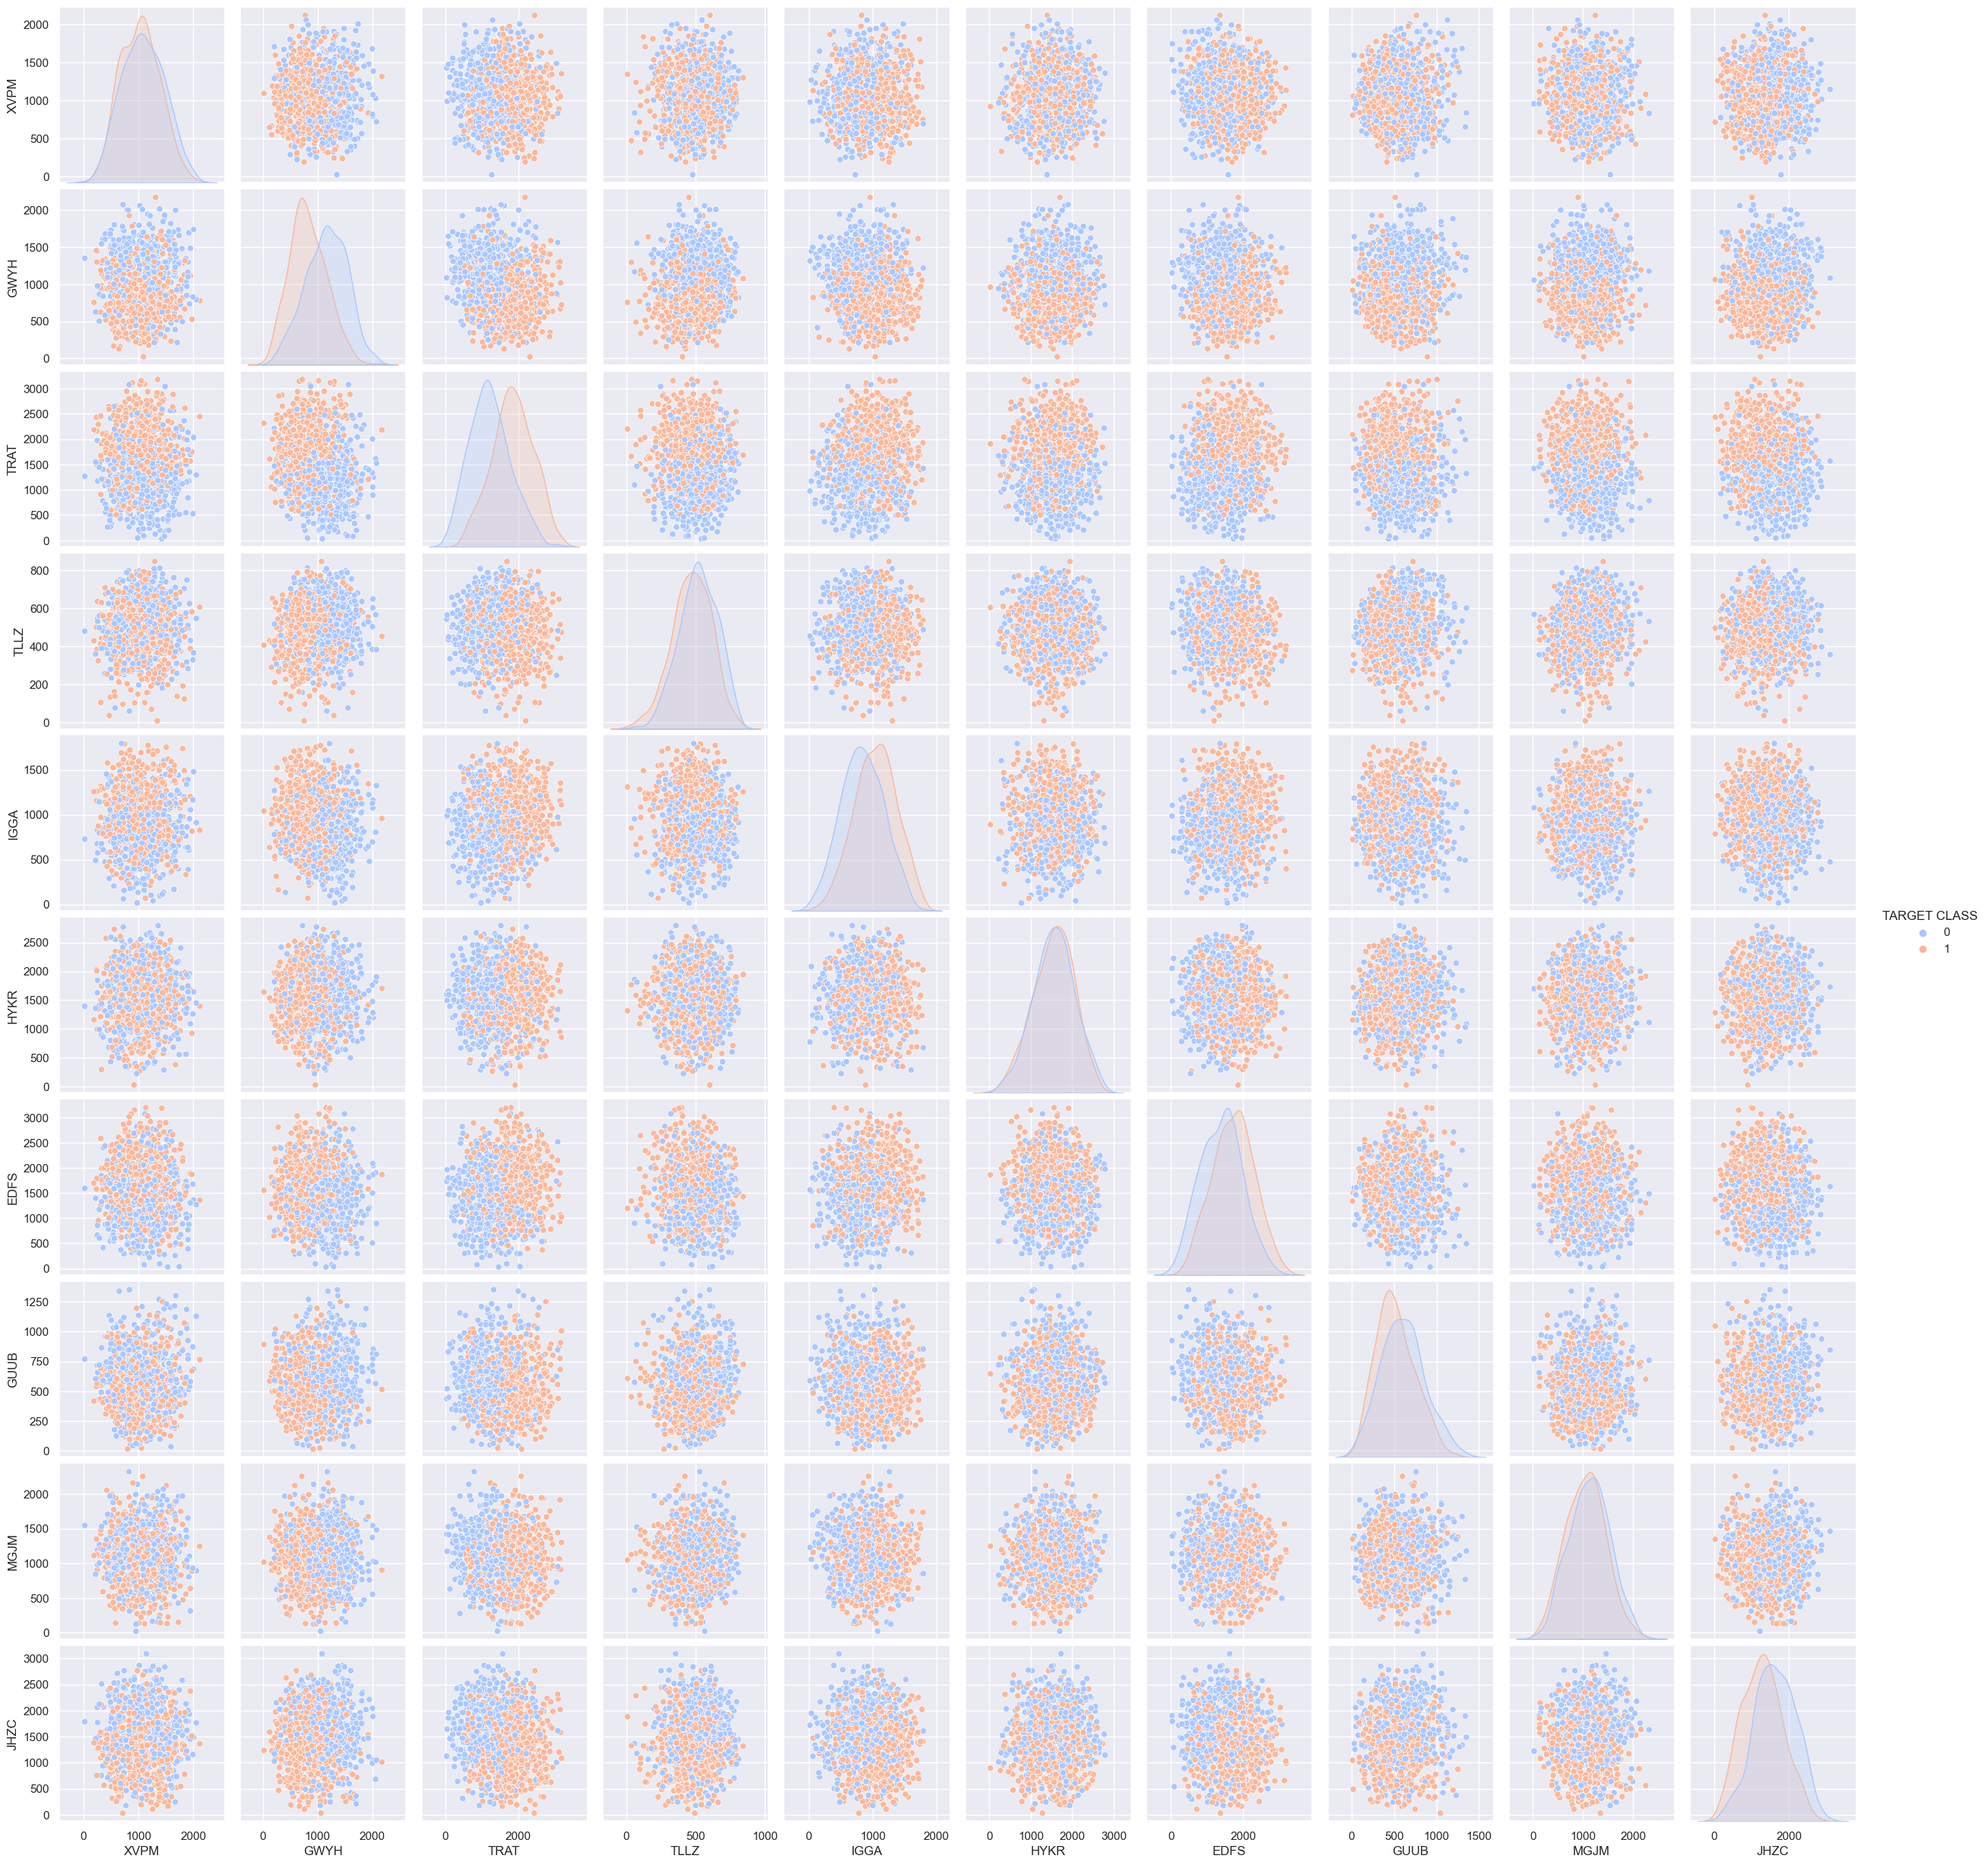

In [8]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

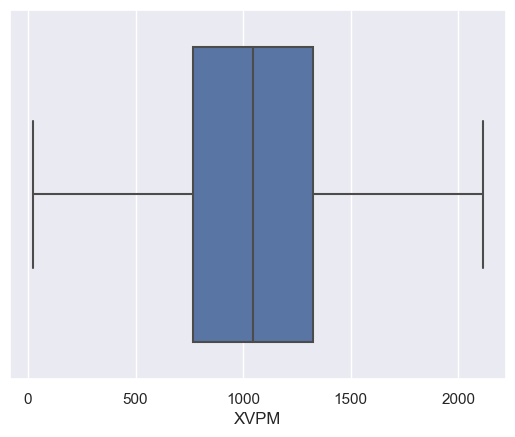

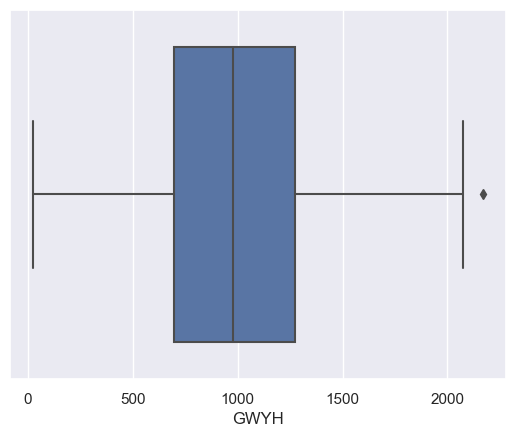

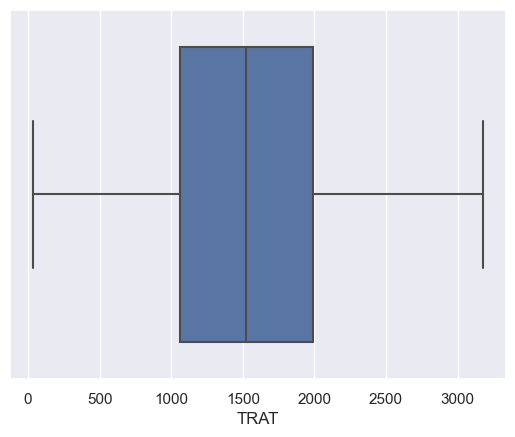

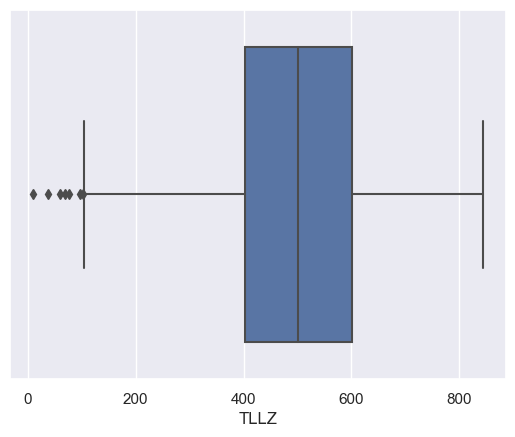

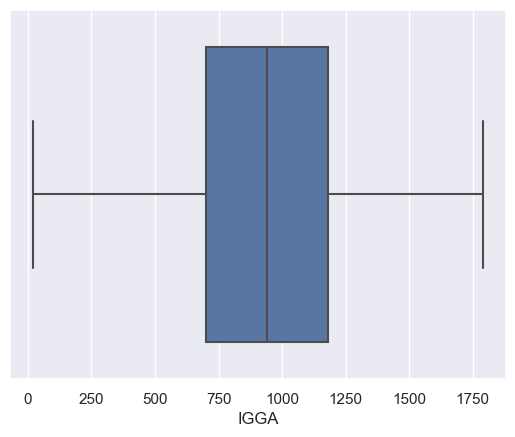

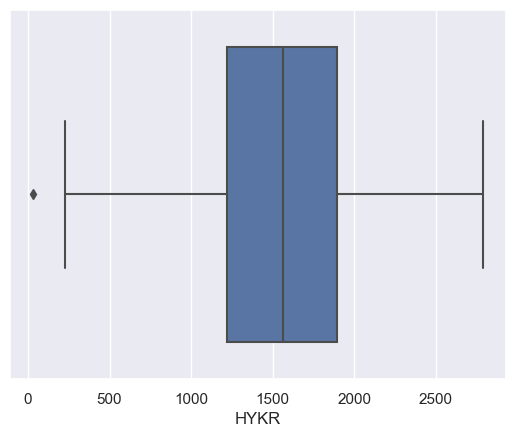

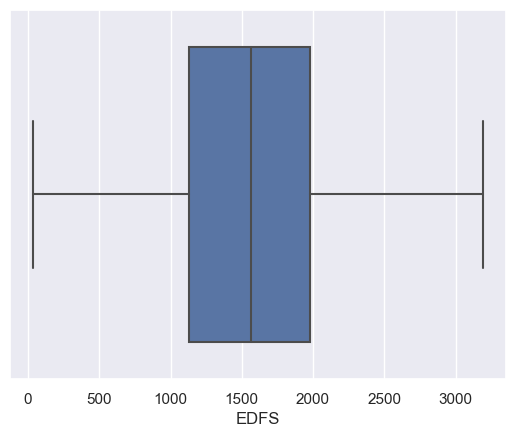

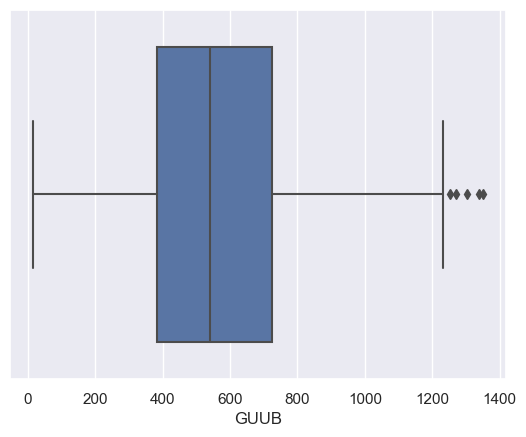

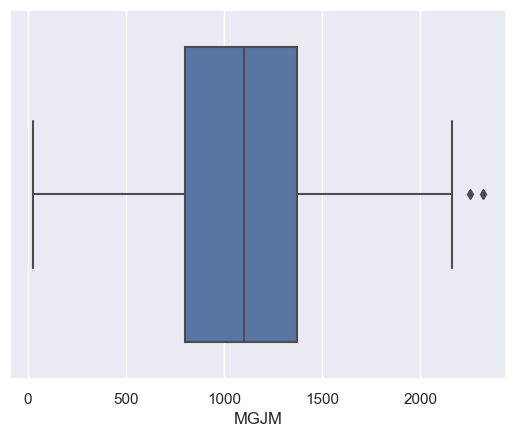

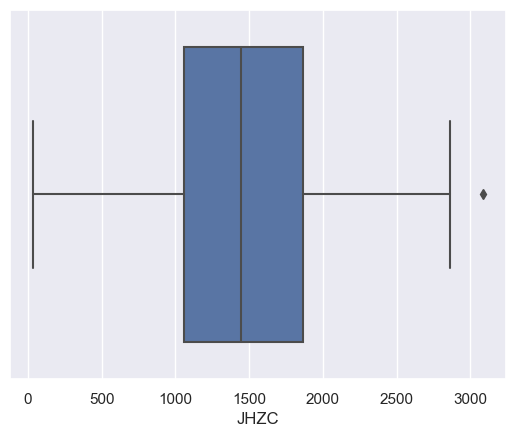

In [9]:
for col in df.columns[:-1]:
    sns.boxplot(data = df ,x = col)
    plt.show()

**There are some outlier in some columns in our data lets handlie them**

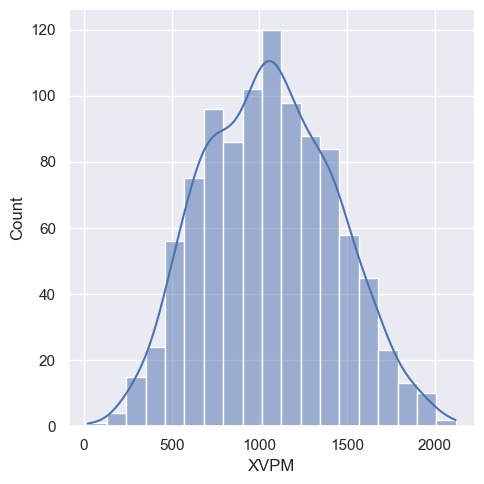

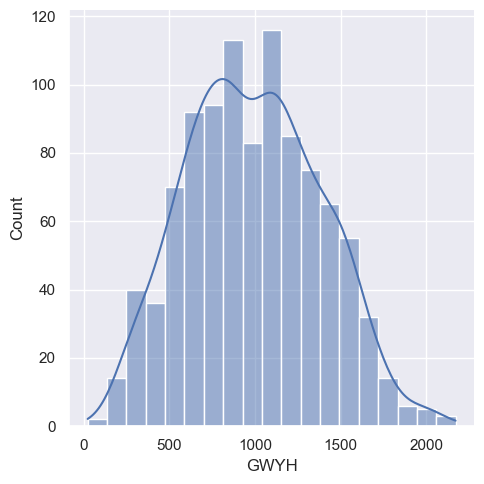

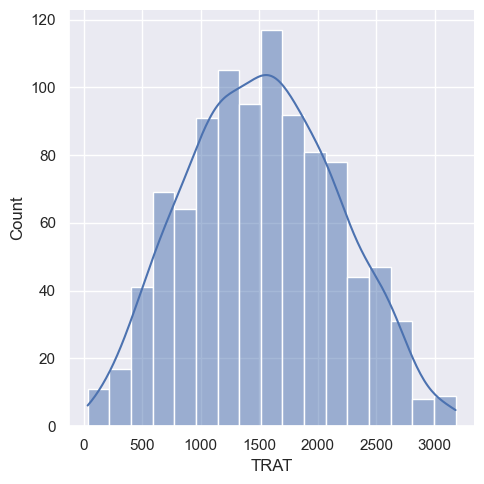

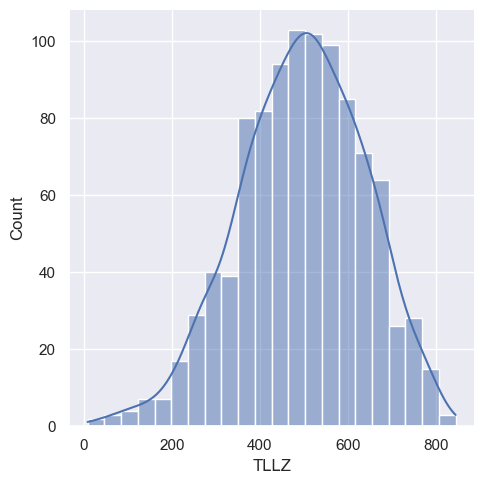

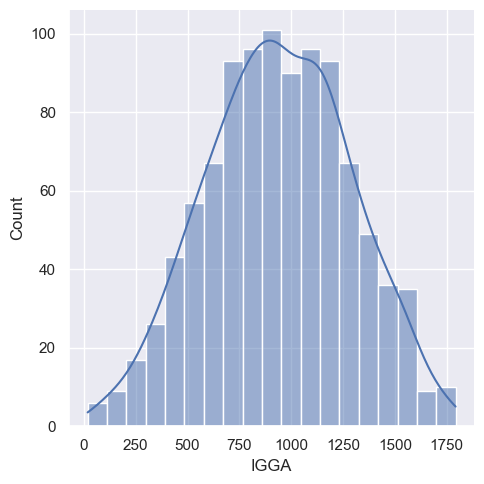

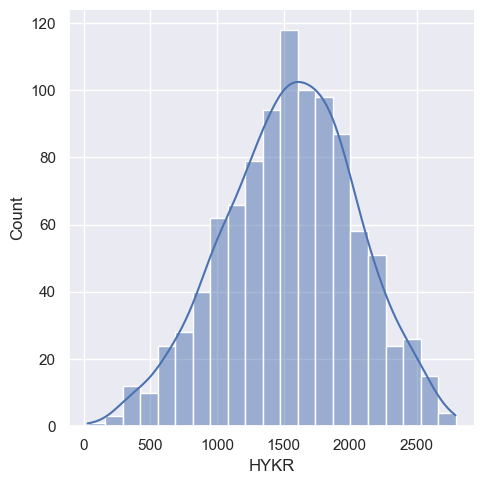

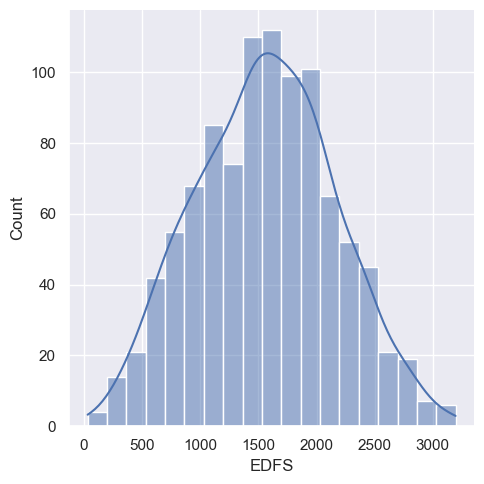

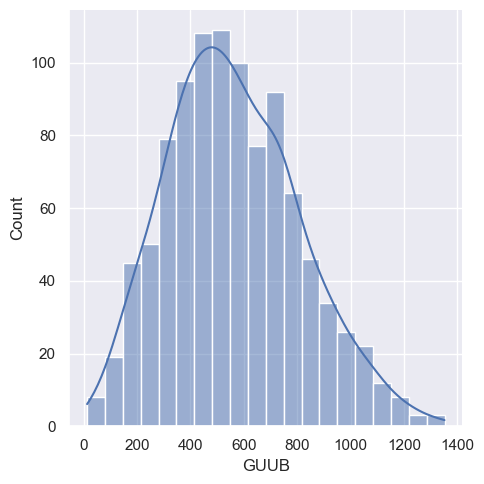

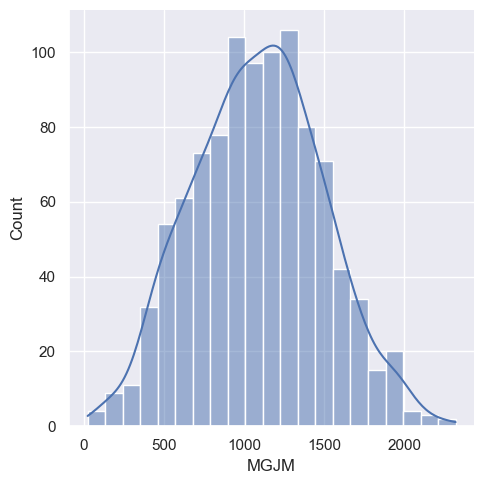

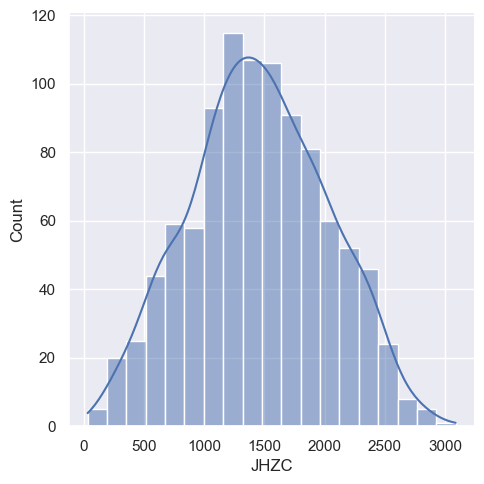

In [10]:
for col in df.columns[:-1]:
    sns.displot(data = df ,x = col,kde =True)
    plt.show()

**Since the data is is mostly normaly distributed so we will use the Z - Score method to handle the outlier**

In [11]:
def Remove_outlier(col):
    upper_limit = df[col].mean() + 3*df[col].std()
    lower_limit = df[col].mean() - 3*df[col].std()

    df[col] = np.where(
        df[col]>upper_limit,
        upper_limit,
        np.where(
            df[col]<lower_limit,
            lower_limit,
            df[col]
        )
    )

In [12]:
Remove_outlier(col='GWYH')
Remove_outlier(col='TLLZ')
Remove_outlier(col='HYKR')
Remove_outlier(col='GUUB')
Remove_outlier(col='MGJM')
Remove_outlier(col='JHZC')

# Corelation

In [13]:
df.corr()['TARGET CLASS'].sort_values(ascending = False)

TARGET CLASS    1.000000
TRAT            0.489347
IGGA            0.295390
EDFS            0.281607
HYKR           -0.015184
XVPM           -0.079896
MGJM           -0.098845
TLLZ           -0.171821
GUUB           -0.174337
JHZC           -0.301725
GWYH           -0.416187
Name: TARGET CLASS, dtype: float64

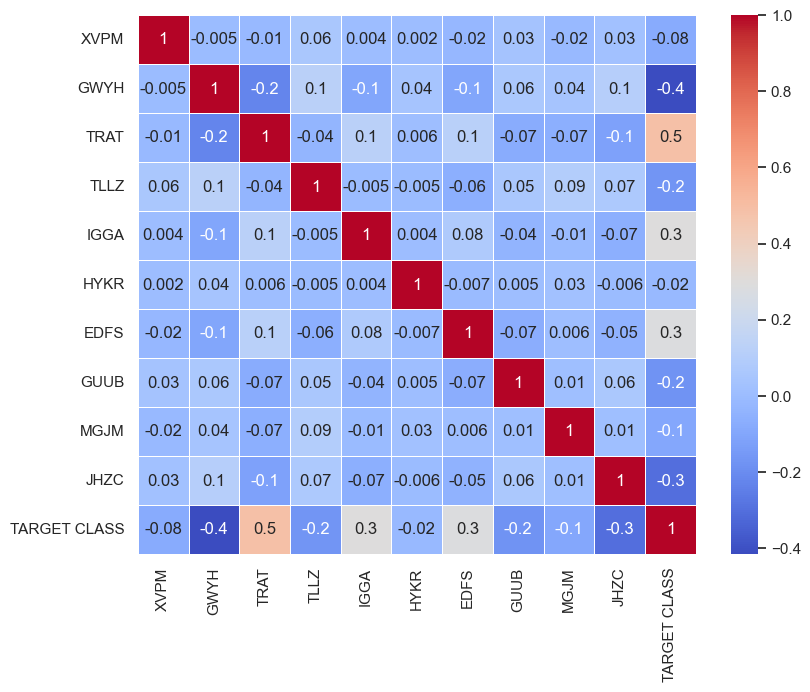

In [14]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True,fmt='.1g',linewidth=.5)
plt.show()

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['TARGET CLASS'],axis=1)
y = df['TARGET CLASS']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30)

# Standardize the Variables

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [24]:
pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[115  38]
 [ 37 110]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       153
           1       0.74      0.75      0.75       147

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!


In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

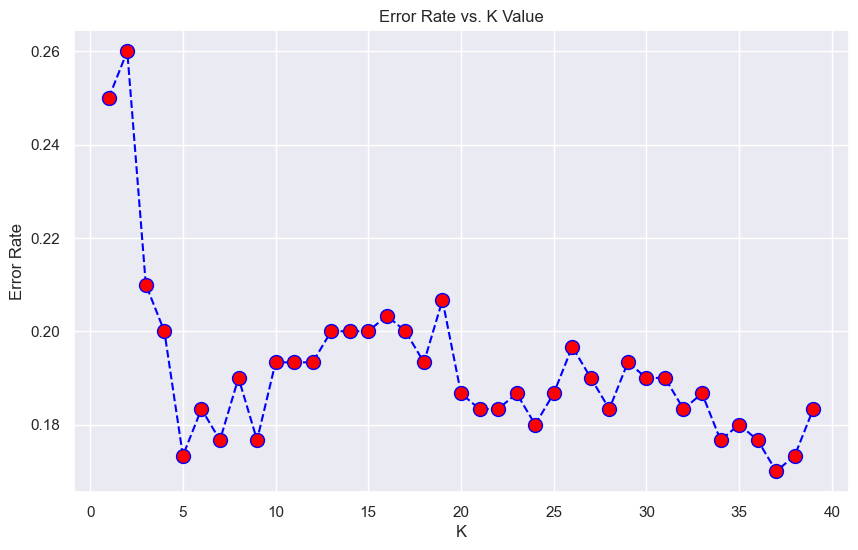

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value



In [31]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[129  24]
 [ 28 119]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       153
           1       0.83      0.81      0.82       147

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

